$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$
$$
u(x,0) = f(x) = e^{-x^2}, \quad x \in [-5,5]
$$

$$
u(-5,t) = g_1(t), \quad u(5,t) = g_2(t), \quad t \geq 0
$$

In [1]:
# =============
# CARGA DE LIBRERIAS

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

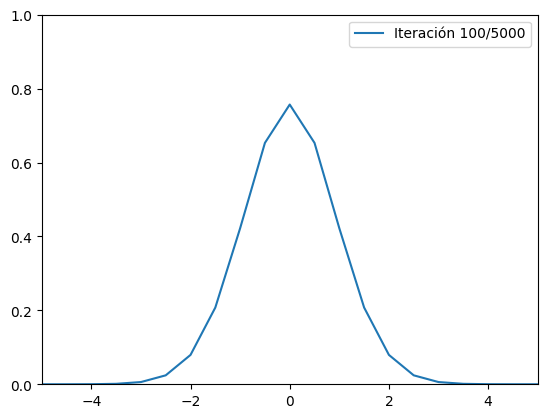

In [ ]:
# RESOLUCION MEDIANTE MDF

# Parámetros
eI = -5
eD = 5
T = 10

# Función inicial
def uCero(x):
    return np.exp(-x**2)

def f(x, t):
    return 0 * t * x

def alpha(t):
    return uCero(eI)

def beta(t):
    return uCero(eD)

N = 19
h = (eD - eI) / (N + 1)
x = np.linspace(eI, eD, N + 2)

plt.ion()
fig, ax = plt.subplots()
ax.set_xlim(eI, eD)
ax.set_ylim(0, 1)
line, = ax.plot(x, uCero(x), label="Iteración 0")
legend = ax.legend()

L = 5000
tau = T / L
t = np.linspace(0, T, L + 1)

lambda_ = tau / h**2

I = sp.eye(N, N)
E = sp.diags([1], offsets=[1], shape=(N, N))
D = 2 * I - E - E.T

theta = 0
A = I + theta * lambda_ * D
B = I - (1 - theta) * lambda_ * D

xInt = x[1:-1]
u0 = uCero(xInt)
b0 = tau * f(xInt, 0)
b0[0] += lambda_ * alpha(0)
b0[-1] += lambda_ * beta(0)

for k in range(1, L + 1):
    b1 = tau * f(xInt, k * tau)
    b1[0] += lambda_ * alpha(k * tau)
    b1[-1] += lambda_ * beta(k * tau)
    
    b = B @ u0 + theta * b1 + (1 - theta) * b0
    u1 = spla.spsolve(A, b)
    
    b0 = b1
    u0 = u1
    
    if k % 100 == 0: # Cambiar paso representacion
        line.set_ydata(np.concatenate(([alpha(k * tau)], u0, [beta(k * tau)])))
        line.set_label(f"Iteración {k}/{L}")
        legend.remove()
        legend = ax.legend()
        plt.pause(0.1)

plt.ioff()
plt.show()